In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import table
import datetime
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
# set maximum number of columsn to be displayed
pd.set_option("display.max_columns", 100)
sns.set_style("whitegrid")

# 1. Load Data

In [89]:
train = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Data Understanding
1. check data types
2. Basic dataframe statistics understanding
3. Missing value check
4. Duplicate value check

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges should be numerical but it is an object here

In [91]:
train["TotalCharges"] = train["TotalCharges"].apply(
    pd.to_numeric, errors="coerce")
train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [92]:
train.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [93]:
train[train.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


# 3. Data Visualization
1. Categorical Features:
    - Check unique values
    - count plot & percent plot
    - compare multiple columns relationship
2. Numerical Features:
    - Relaships between numerical features
    - Feature distribution
    - Check skewness
    - Find outliers

## 3.1 Categorical Features: 

In [94]:
# excluded the first ID Column:
categorical_features = train.iloc[:,2:].select_dtypes(include = 'object')
for col in categorical_features:
    print(f"Columns Name: {col} has {len(train[col].unique())} values")
    print(train[col].value_counts())

Columns Name: Partner has 2 values
No     3641
Yes    3402
Name: Partner, dtype: int64
Columns Name: Dependents has 2 values
No     4933
Yes    2110
Name: Dependents, dtype: int64
Columns Name: PhoneService has 2 values
Yes    6361
No      682
Name: PhoneService, dtype: int64
Columns Name: MultipleLines has 3 values
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Columns Name: InternetService has 3 values
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
Columns Name: OnlineSecurity has 3 values
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
Columns Name: OnlineBackup has 3 values
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
Columns Name: DeviceProtection has 3 values
No                     3095
Yes                    2422
No internet serv

In [95]:
def plot_stacked_bar(dataframe, title_, size_ = (18,10), rot_=0, legend_ = "uppder right"):
    ax = dataframe.plot(kind="bar", stacked = True, figsize = size_, rot = rot_, title = title_)
    annotate_stacked_bars(ax, textsize = 14)
    plt.legend(["Retention", "Churn"], loc = legend_)
    plt.show()
def annotate_stacked_bars(ax,pad = 0.99, colour="white", textsize=13):
    for p in ax.patches:
        value = str(round(p.get_height(),1))
        if value == "0.0":
            continue
        ax.annotate(value, ((p.get_x()+p.get_width()/2)*pad-0.05,
                           (p.get_y()+p.get_height()/2)*pad),
                   color = colour, size = textsize,)

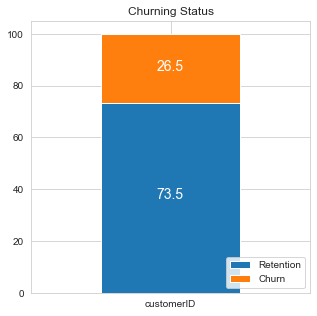

In [96]:
churn = train[['customerID', "Churn"]]
churn_total = churn.groupby(churn["Churn"]).count()
churn_percentage = churn_total/churn_total.sum()*100
plot_stacked_bar(churn_percentage.transpose(), "Churning Status", (5,5), legend_="lower right")

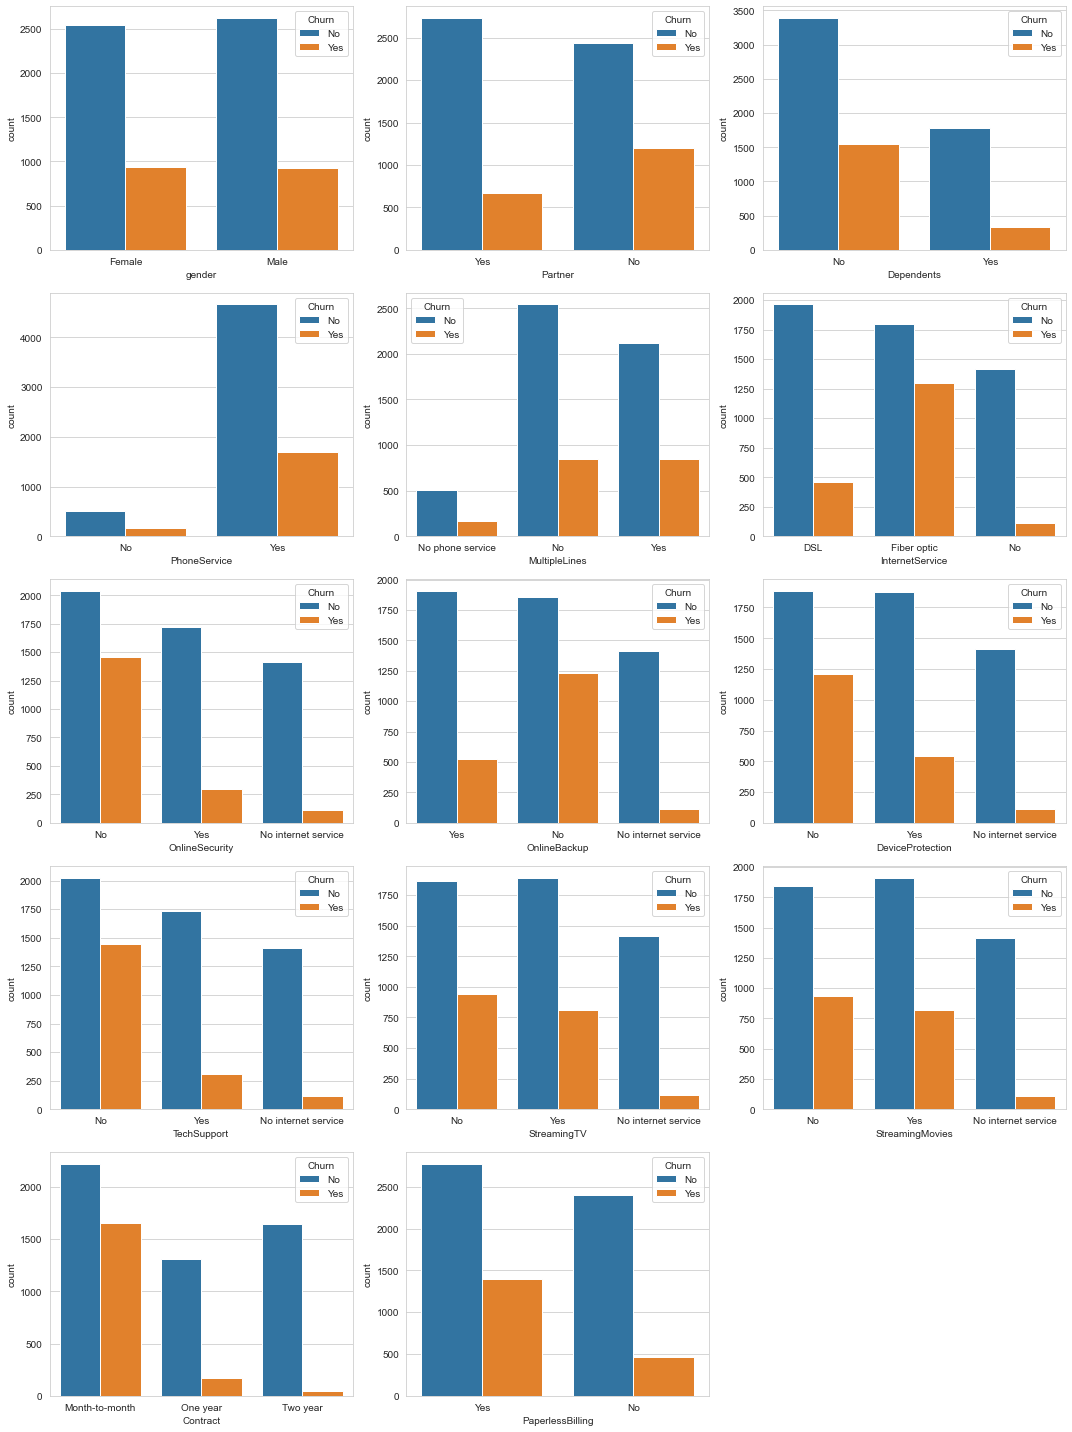

In [97]:
categorical_features = train.select_dtypes(include="object")
plt.figure(figsize=(15,20))
i = 1
for col_name in categorical_features.columns[1:15]:
    plt.subplot(5,3,i) # 共五行，每行3个图
    sns.countplot(categorical_features[col_name],hue=categorical_features['Churn'])
    i +=1
    plt.tight_layout()

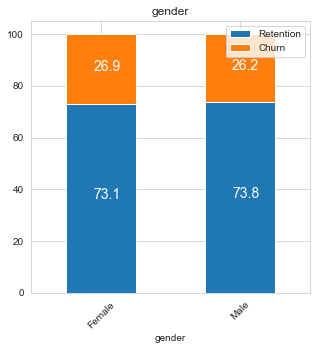

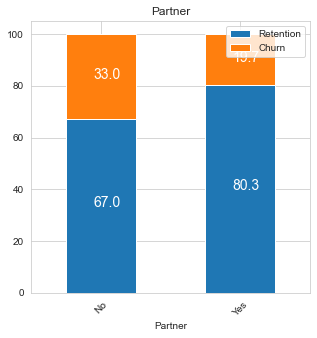

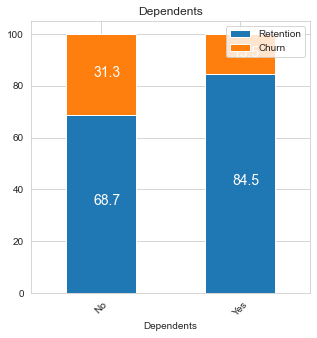

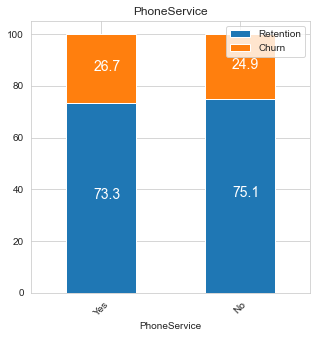

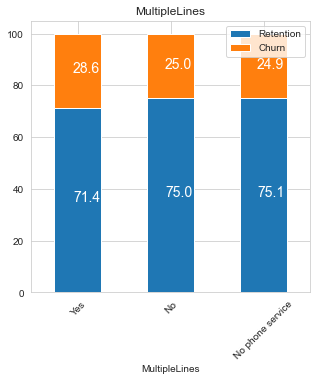

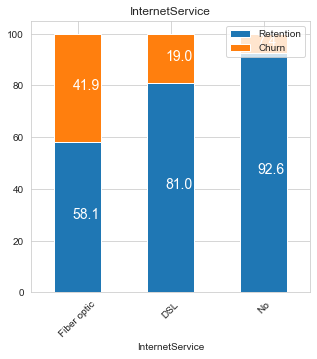

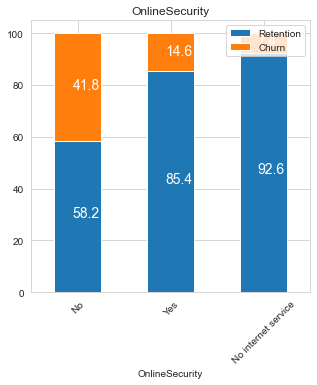

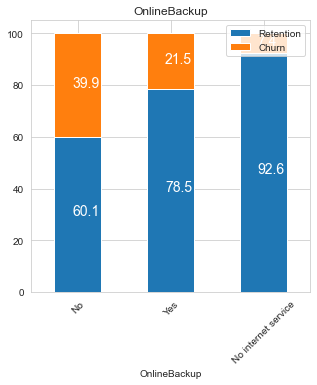

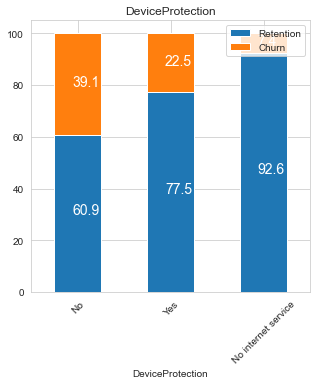

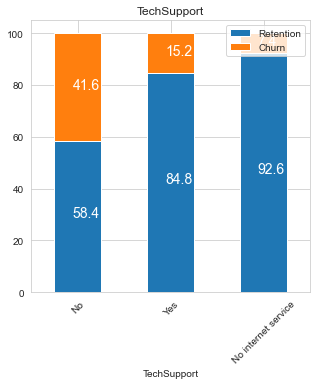

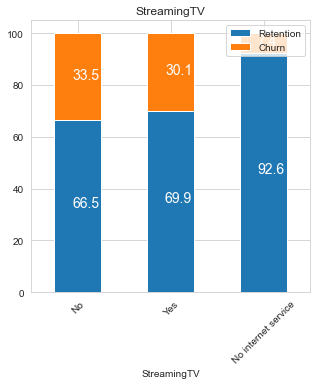

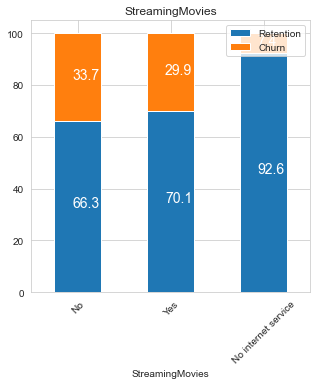

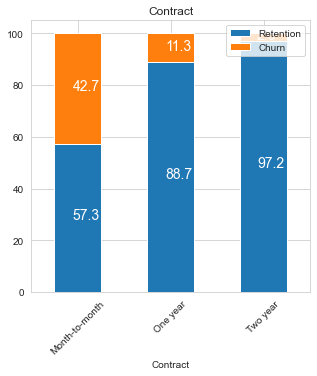

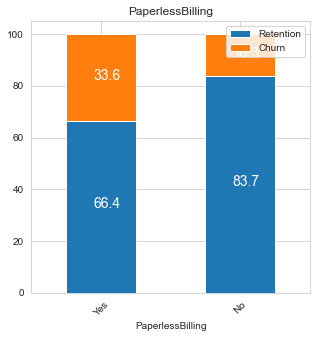

In [98]:
for col_name in categorical_features.columns[1:15]:
    df=categorical_features.groupby(
        [categorical_features[col_name], categorical_features["Churn"]]
    )["customerID"].count().unstack(level = 1)
    df_p=(df.div(df.sum(axis="columns"), axis="index")*100).sort_values(by=["Yes"], ascending = False)
    plot_stacked_bar(df_p, col_name,(5,5),45,legend_="upper right" )
plt.show()

In [99]:
# display tenure months amoung 3 contract types
def contract_plot(contract_type,col):
    ax  = sns.distplot(train[train["Contract"] ==contract_type][col],
                     hist=True, kde = True, 
                     bins = int(180/5))
    ax.set_ylabel("# of Customers")
    ax.set_xlabel(col)
    ax.set_title(contract_type)

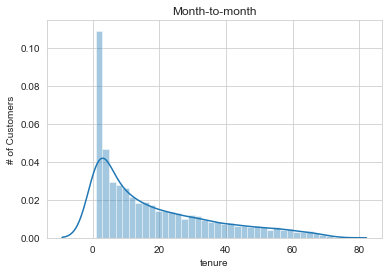

In [100]:
contract_plot("Month-to-month",'tenure')

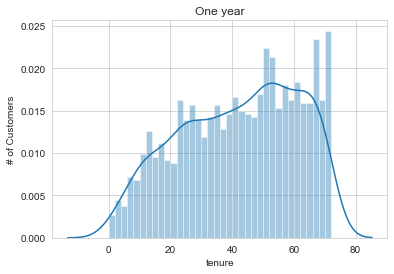

In [101]:
contract_plot("One year",'tenure')

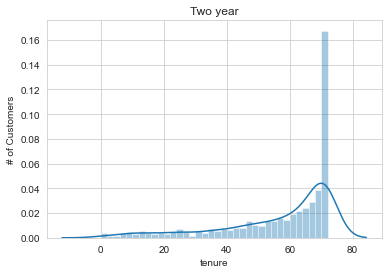

In [102]:
contract_plot("Two year",'tenure')

From the above images we can see that:

1. gender doesn't affect the churn rate
2. without partner have higher churn rate
3. without dependent have higher churn rate
4. PhoneService don't have much differences
5. with multiple lines have slightly higher churn rate, but not much difference
6. with Fiber optic internet service have higher churn rate
7. without online security have higher churn, and No internet service sounds like no security, need to confirm this variable
8. without online backup have higher churn
9. no device protection have higher churn
10. no tech support have higher churn
11. no streaming TV have higher churn
12. no streaming movie have higher churn
13. Contract type: when we dig deeper, data shows more people are using month-to-month contracts)
    - month-to-month leads to less tenure months --> higher Churn rate
14. with paperless Bill have higher churn

##  3.2 Numerical Features

In [103]:
def plt_distribution(dataframe, col):
    temp = pd.DataFrame({"Retention": dataframe[dataframe["Churn"]=="No"][col],
                        "Churn": dataframe[dataframe["Churn"]=="Yes"][col]})
    temp[["Retention", "Churn"]].plot(kind="hist", bins = 35,  stacked = True)
    temp[["Retention", "Churn"]].plot(kind="kde")
    plt.xlabel(col)
    plt.show()

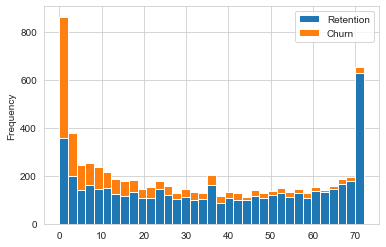

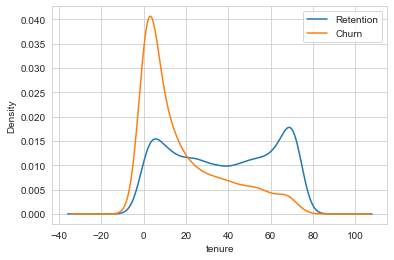

In [104]:
plt_distribution(train,"tenure" )

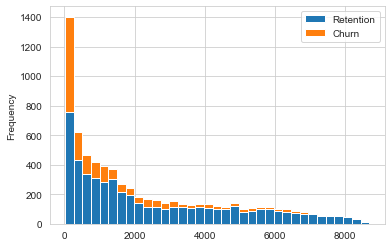

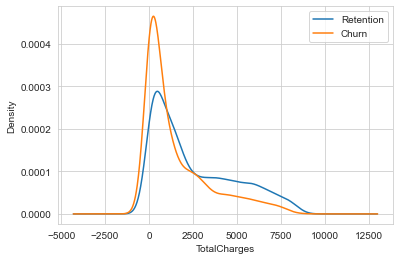

In [105]:
plt_distribution(train, "TotalCharges")

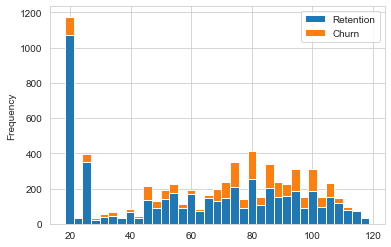

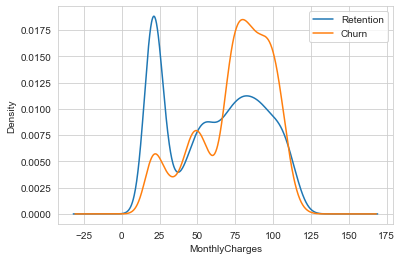

In [106]:
plt_distribution(train,"MonthlyCharges")

1. Tenure: number of months are customer has styaed with the company
    - less than 10 months customer are more likely to leave, but 60-70 months customer have higher loyalty
2. Monthly Charges: the amount charged to the customer monthly
    - most customer stay if the monthly spent is $20-$25, while customer are likely to leave if the montly spent is ranging from $70-$90

In [107]:
num_features = train[["tenure", "MonthlyCharges", "TotalCharges"]]
skew_features = num_features.skew().sort_values(ascending=False)
skew_features

TotalCharges      0.961642
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

<AxesSubplot:xlabel='TotalCharges'>

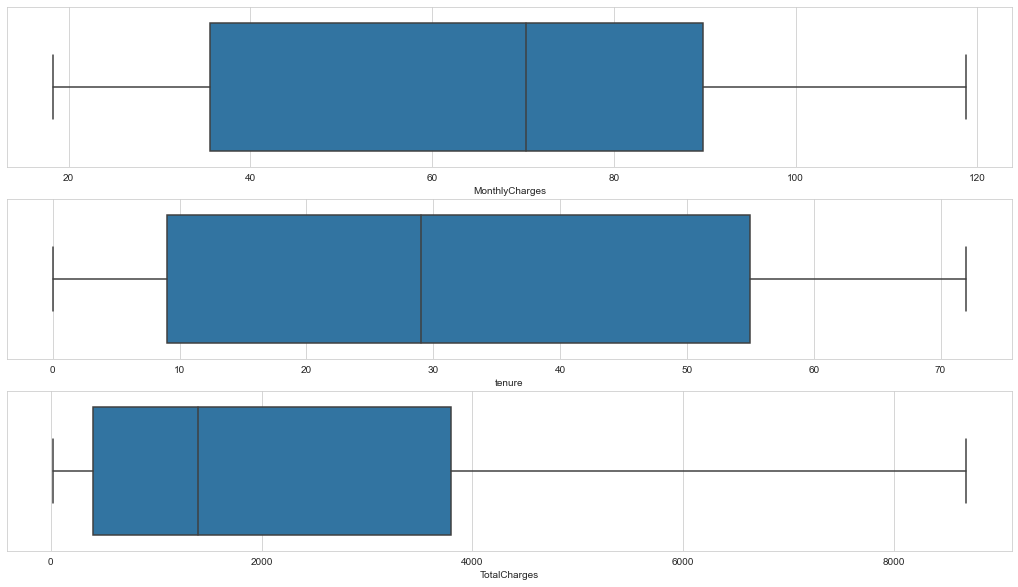

In [108]:
fig, axs = plt.subplots(nrows=3, figsize = (18,10))
sns.boxplot(train["MonthlyCharges"],ax = axs[0])
sns.boxplot(train["tenure"],ax = axs[1])
sns.boxplot(train["TotalCharges"],ax = axs[2])

From the graph and number above, column TotalCharges is moderately positive skewed. 0.5 < 0.96 < 1
And the other 2 is pretty close to 0, it is find to train the model with these features as they are

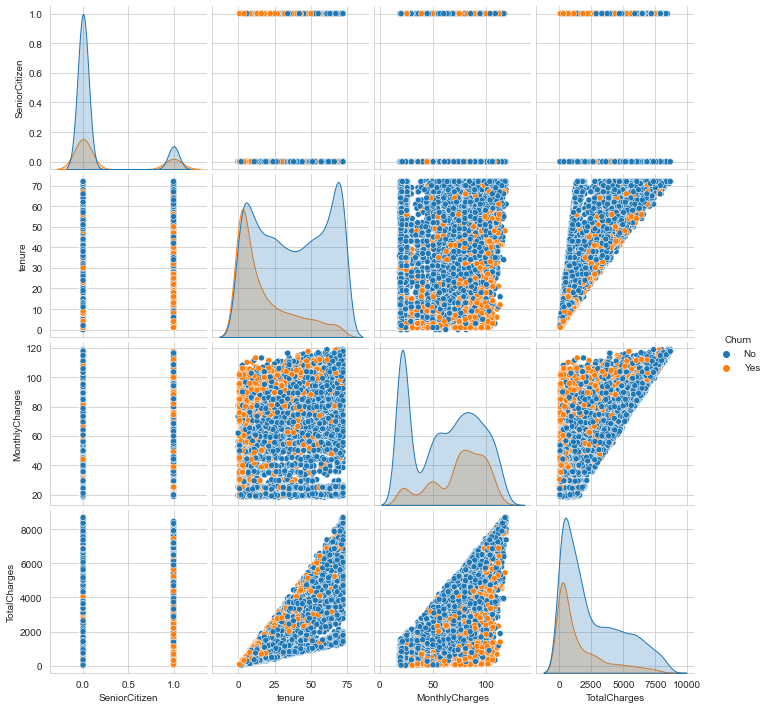

In [109]:
sns.pairplot(train,hue="Churn")

In [110]:
for feature in num_features.columns:
    val = np.where(np.abs(stats.zscore(train[feature])>3))
    print(f"{feature} column has {len(val[0])} outliers")
    print(val[0])

tenure column has 0 outliers
[]
MonthlyCharges column has 0 outliers
[]
TotalCharges column has 0 outliers
[]


# 4. Data Cleaning:
1. replace missing value to median
2. Categorical features
    - one-hot encoding
    - Change to dummy variables

In [111]:
# Total Charges has 11 missing values, replace with median value
train.loc[train["TotalCharges"].isnull(), "TotalCharges"] = train["TotalCharges"].median()
train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Simplified some columns to "Yes" or "No" options only
- 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'
    - transform "No internet service" to "No"
- 'MultipleLines'
    - transform "No phone service" to "No"

In [112]:
no_internet = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for column in no_internet:
    train[column] = train[column].replace({"No internet service":"No"})
# MultipleLines:
train["MultipleLines"] = train["MultipleLines"].replace({"No phone service":"No"})

In [113]:
# find all the unique value in each column
categorical_features = train.select_dtypes(include="object")
for col in categorical_features.columns:
    print(f"{col}: {categorical_features[col].unique()}")
    train[col] = train[col].astype("category")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [115]:
# transform binary value column by using onehot encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoding = LabelEncoder()
onehot_cols = ["gender","Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection",
              "TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]
for col in onehot_cols:
    train[col] = label_encoding.fit_transform(train[col])
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [116]:
# transform categorical features to dummy variable
categorical_features = train.select_dtypes(include="category") # find the rest of categorical features
cat_cols = categorical_features.drop("customerID", axis=1).columns.tolist() # exclude the ID column
train = pd.get_dummies(train,columns = cat_cols, drop_first=True)
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,0,0,1,0


In [117]:
correlation = train.corr()
correlation

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,-0.011754,-0.014569,-0.000002,-0.008612,-0.011286,0.006026,0.008026,-0.003695,0.001215,0.000752,0.013744
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,0.156530,0.220173,0.102652,0.150889,0.255338,-0.182742,-0.046262,-0.117000,-0.024135,0.171718,-0.153477
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,-0.014877,0.096848,0.318364,-0.150448,0.000304,0.000615,0.082783,0.248091,0.082029,-0.083852,-0.095125
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,-0.111377,-0.113890,0.063593,-0.164221,-0.165818,0.139812,0.068368,0.204613,0.060267,-0.150642,0.059071
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.006152,0.247900,0.825464,-0.352229,0.019720,-0.039062,0.202570,0.558533,0.233006,-0.208363,-0.233852
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.016505,0.247398,0.113013,0.011942,0.289999,0.172209,-0.002791,0.003519,-0.007721,0.003062,-0.003319
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.163530,0.490434,0.468705,0.040102,0.366083,-0.210564,-0.003794,0.106253,0.060048,0.083618,-0.227206
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,-0.003636,0.296594,0.412091,-0.171226,-0.030696,-0.333403,0.100162,0.191773,0.115721,-0.112338,-0.080798
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.126735,0.441780,0.509607,-0.082255,0.165651,-0.381593,0.083722,0.111400,0.090785,-0.000408,-0.174164
DeviceProtection,-0.002105,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.103797,0.482692,0.522374,-0.066160,0.176049,-0.380754,0.102495,0.165096,0.111554,-0.003351,-0.187373


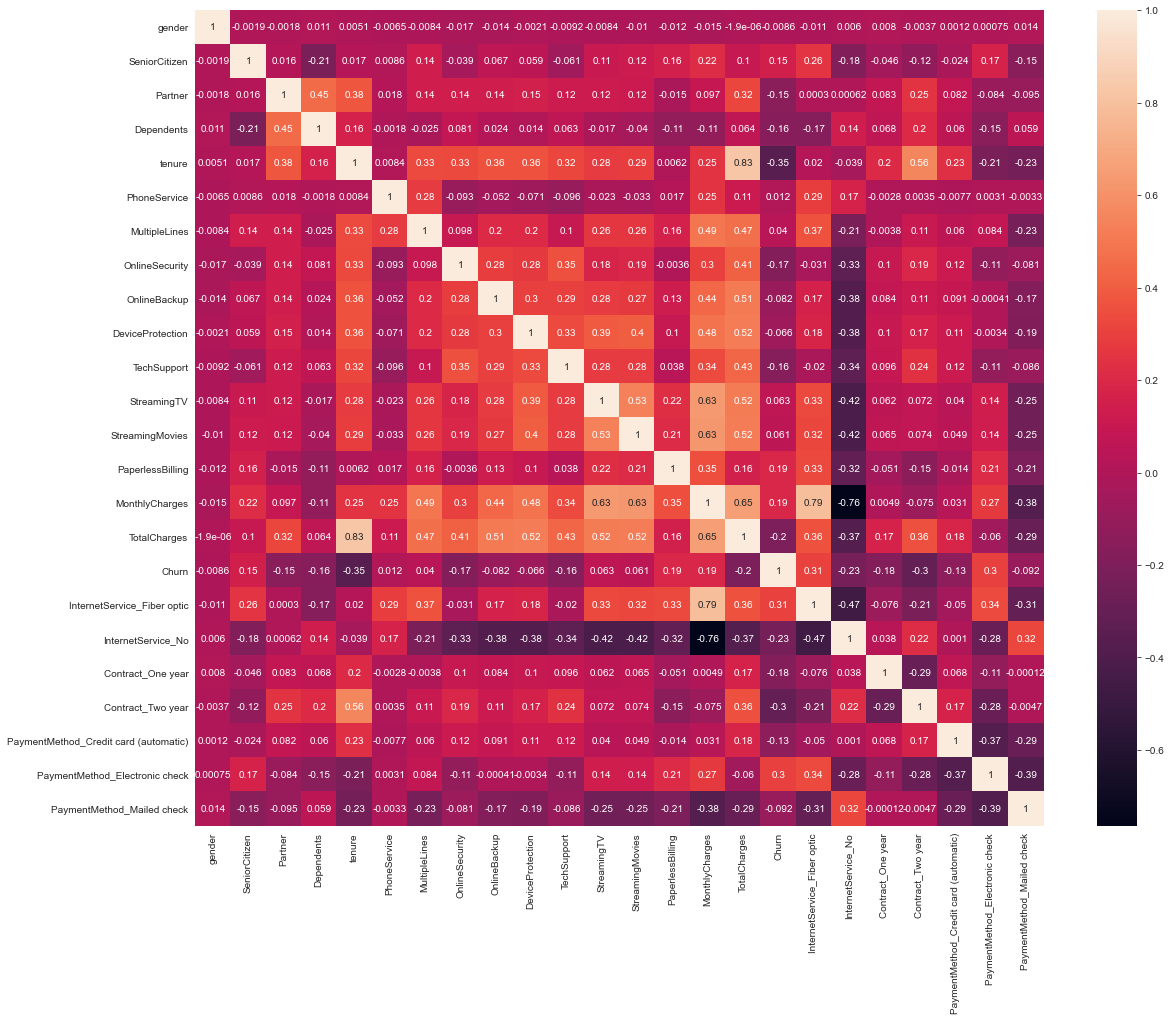

In [118]:
plt.figure(figsize=(19,15))
sns.heatmap(correlation,xticklabels=correlation.columns.values,
           yticklabels = correlation.columns.values, annot=True, annot_kws = {"size":10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

It seems like tenure and contract type (2 years contract) have higher correlation with Churn rate

#### Highly correlated (collinear) columns
Collinear columns can slow down training, lead to less interpretable models, and decrease generalization performance. Therefore, it's generally a good idea to remove one of each pair of highly correlated columns for machine learning. The following code identifies columns that exceed an absolute magnitude correlation of 0.95.

In [119]:
threshold = 0.95
corr = train.corr().abs()
# subset to the upper triangle of the correlation matrix, avoiding finding self column vs. self columns
upper = corr.where(
    np.triu(np.ones(corr.shape), k=1).astype(np.bool))
# Identify names of columns with correlation above threshold
to_drop = [column for column in upper.columns if any(
    upper[column] >= threshold)]
print(
    f'There are {len(to_drop)} columns to drop with correlation > {threshold}')

There are 0 columns to drop with correlation > 0.95


# 5. Modeling

In [120]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import validation_curve
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [121]:
X = train.drop(["customerID", "Churn"], axis = 1)
y = train["Churn"]

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

## Naive Baseline
For a naive baseline, we can randomly guess that customer has churned with the same frequence of the churns in the training data. And We are using different metrics to evaluate the classification problem
1. ROC AUC (Receiver Operating Characterstic Area Under the Curve): a measure between 0 and 1, comparing the performance of the classifer when predicting probabilities across a range of thresholds. 
2. Precision Score: true positive / total number of positives predicted
3. Recall Score: true positive / total number of actual positives in the data

The exact metrics used and threshold definition depends on the business need. 

In [123]:
np.random.seed(50)
naive_guess = np.random.binomial(1, p=np.mean(y),size = len(y_test))
naive_guess[:10], naive_guess.sum()

(array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0]), 481)

In [124]:
from sklearn.metrics import (roc_auc_score, precision_score,
                             recall_score,f1_score)
roc = roc_auc_score(y_test, np.repeat(np.mean(y), len(y_test)))
print(f'ROC AUC: {round(roc, 4)}')
for metric in [precision_score, recall_score,f1_score]:
    print(f'{metric.__name__}: {round(metric(y_test, naive_guess), 4)}')

ROC AUC: 0.5
precision_score: 0.2827
recall_score: 0.2839
f1_score: 0.2833


In [125]:
print(
    f'The percentage of churns is {100 * round(np.mean(y), 4)}% in the training data.')

The percentage of churns is 26.540000000000003% in the training data.


We can see that these metrics are very poor. A naive approach clearly does not provide much insight. 

## Baseline Model -- Logistic Regression

In [126]:
def evaluate(model, X_test, y_test):
    prediction_test = model.predict(X_test)
    results = pd.DataFrame({"Accuracy":[metrics.accuracy_score(y_test, prediction_test)],
                            "Error Rate":[1-metrics.accuracy_score(y_test, prediction_test)],
                           "Precision":[metrics.precision_score(y_test, prediction_test)],
                           "Recall":[metrics.recall_score(y_test, prediction_test)],
                           "f1-score":[metrics.f1_score(y_test, prediction_test)]})
    return results

In [127]:
def calculate_roc_auc(model,X_test, y_test):
    prediction_test = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction_test)
    score = pd.DataFrame({"ROC-AUC":[metrics.auc(fpr, tpr)]})
    plot_roc_auc(fpr, tpr)
    return score

In [128]:
def plot_roc_auc(fpr, tpr):
    f, ax = plt.subplots(figsize=(14,8))
    roc_auc = metrics.auc(fpr, tpr)
    ax.plot(fpr, tpr, lw=2, alpha=0.3, label="AUC = %0.2f" %(roc_auc))
    plt.plot([0,1],[0,1], linestyle = "--", lw=3, color="r", label= "Random", alpha=.8)
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel("False Positive Rate (FPR)")
    ax.set_ylabel("True Positive Rate (TPR)")
    ax.set_title("ROC-AUC")
    ax.legend(loc="lower right")
    plt.show()

In [129]:
def plot_confusion_matrix(data, labels):
    sns.set(color_codes = True)
    plt.figure(1, figsize=(9,6))
    plt.title("Confusion Matrix")
    sns.set(font_scale = 1.4)
#     fmt='g' not showing scientific notation for number labeling
    ax = sns.heatmap(data, annot=True, fmt='g',cmap="YlGnBu", cbar_kws = {"label":"Scale"})
    
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set(ylabel="Actual cases", xlabel="Predicted cases")
    plt.show()

In [130]:
log = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)
evaluate(log, X_test, y_test)

,Accuracy,Error Rate,Precision,Recall,f1-score
0,0.810903,0.189097,0.691099,0.551148,0.61324


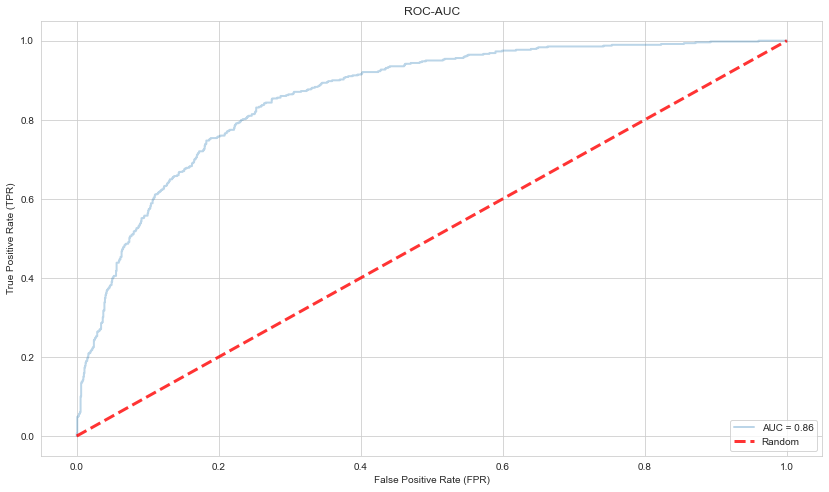

,ROC-AUC
0,0.860128


In [131]:
calculate_roc_auc(log, X_test, y_test)

The baseline Logistic regression model does perform so much better than guessing in terms of ROC AUC. Precision, Recall and F1-score are much better than the guessing model. F1 score (default threshold of 0.5 for classifying positive examples). Even though this model performs good enough, but we can explore more complex model as well

In [133]:
clf=RandomForestClassifier(n_jobs=-1,n_estimators=100,
                           max_depth=40,
                           random_state = 42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

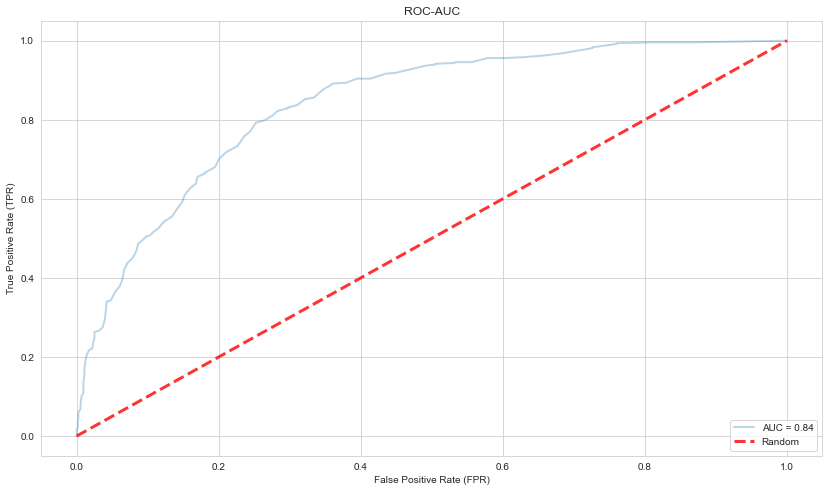

,ROC-AUC
0,0.839213


In [134]:
calculate_roc_auc(clf, X_test, y_test)

In [135]:
evaluate(clf, X_test, y_test)

,Accuracy,Error Rate,Precision,Recall,f1-score
0,0.794435,0.205565,0.675676,0.469729,0.554187


### Precision Recall Curve
One of the best methods for tuning a model for a business need is through the precision recall curve. This shows the precision-recall tradeoff for different thresholds. Depending on the business requirement, we can change the threshold for classifying a positive example to alter the balance of true positives, false positives, false negatives, and true negatives. There will always be a tradeoff between precision and recall, but we can try to find the right balance by visually and quantitatively assessing the model.

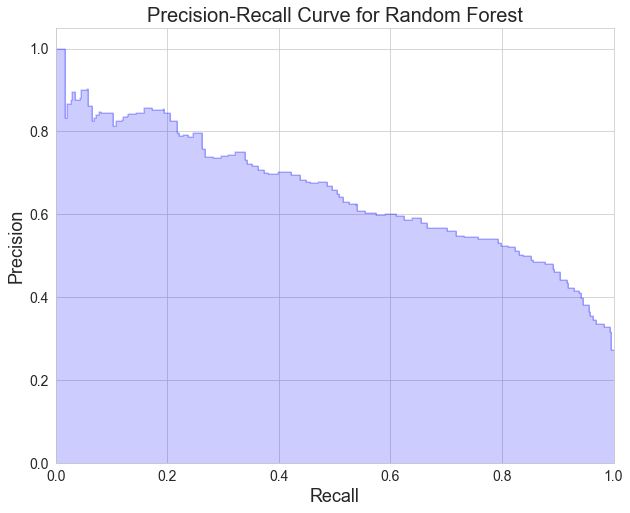

In [141]:
from sklearn.metrics import precision_recall_curve, confusion_matrix
def plot_precision_recall(y_test, probs, title='Precision Recall Curve', threshold_selected=None):
    """Plot a precision recall curve for predictions. 
       Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py"""

    precision, recall, threshold = precision_recall_curve(y_test, probs)
    plt.figure(figsize=(10, 8))
    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall', size=18)
    plt.ylabel('Precision', size=18)
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(title, size=20)
    plt.xticks(size=14)
    plt.yticks(size=14)

    if threshold_selected:
        p = precision(np.where(threshold == threshold_selected)[0])
        r = recall(np.where(threshold == threshold_selected)[0])
        plt.scatter(r, p, marker='*', size=200)
        plt.vlines(r, ymin=0, ymax=p, linestyles='--')
        plt.hlines(p, xmin=0, xmax=r, linestyles='--')

    pr = pd.DataFrame({'precision': precision[:-1], 'recall': recall[:-1],
                       'threshold': threshold})
    return pr


probs = clf.predict_proba(X_test)[:, 1]
pr_data = plot_precision_recall(
    y_test, probs, title='Precision-Recall Curve for Random Forest')

We can query the dataframe to find the threshold required for a given precision or recall. For example, to find the threshold for a precision of 50%, we use the following code

In [144]:
precision_above = pr_data.loc[pr_data['precision'] >= 0.50].copy()
precision_above.sort_values('recall', ascending=False, inplace=True)
precision_above.head()

,precision,recall,threshold
37,0.501877,0.837161,0.240000
38,0.510911,0.830898,0.241500
39,0.510283,0.828810,0.244333
40,0.511598,0.828810,0.250000
41,0.519789,0.822547,0.254310


We can see that if we want a precision of 50%, then our recall will be 83%. This means we'll miss only 17% of the true churns in the data.

In [145]:
recall_attained = 0.75
recall_above = pr_data.loc[pr_data['recall'] >= recall_attained].copy()
recall_above.sort_values('precision', ascending=False, inplace=True)
recall_above.head()

,precision,recall,threshold
48,0.545865,0.757829,0.31000
47,0.541056,0.770355,0.30000
46,0.539773,0.793319,0.29000
45,0.539007,0.793319,0.28881
44,0.531293,0.797495,0.28000


In [146]:
precision_attained = recall_above.iloc[0, 0]
threshold_required = recall_above.iloc[0, -1]

print(
    f'At a threshold of {round(threshold_required, 4)} the recall is {100 * recall_attained:.2f}% and the precision is {round(100 * precision_attained, 4)}%')

At a threshold of 0.31 the recall is 75.00% and the precision is 54.5865%


In [147]:
def plot_precision_recall(test_y, probs, title='Precision Recall Curve', threshold_selected=None):
    """Plot a precision recall curve for predictions. 
       Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py"""

    precision, recall, threshold = precision_recall_curve(test_y, probs)
    plt.figure(figsize=(10, 10))
    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall', size=24)
    plt.ylabel('Precision', size=24)
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(title, size=24)
    plt.xticks(size=18)
    plt.yticks(size=18)

    if threshold_selected:
        p = precision[np.where(threshold == threshold_selected)[0]]
        r = recall[np.where(threshold == threshold_selected)[0]]
        plt.scatter(r, p, marker='*', s=600, c='r')
        plt.vlines(r, ymin=0, ymax=p, linestyles='--')
        plt.hlines(p, xmin=0, xmax=r, linestyles='--')
        plt.text(r - 0.1, p + 0.15,
                 s=f'Threshold: {round(threshold_selected, 2)}', size=20, fontdict={'weight': 1000})
        plt.text(r - 0.2, p + 0.075,
                 s=f'Precision: {round(100 * p[0], 2)}% Recall: {round(100 * r[0], 2)}%', size=20,
                 fontdict={'weight': 1000})

    pr = pd.DataFrame({'precision': precision[:-1], 'recall': recall[:-1],
                       'threshold': threshold})
    return pr

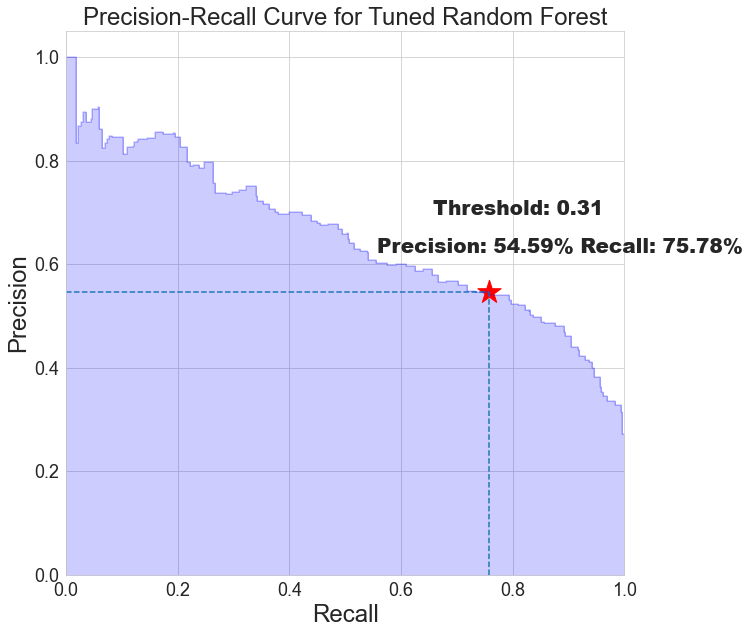

In [148]:
pr_data = plot_precision_recall(y_test, probs, title='Precision-Recall Curve for Tuned Random Forest',
                                threshold_selected=threshold_required)

In [151]:
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.YlOrRd):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.style.use('bmh')
    plt.figure(figsize=(9, 9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=22)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=20)
    plt.yticks(tick_marks, classes, size=20)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 size=20)
    plt.grid(None)
    plt.ylabel('True label', size=22)
    plt.xlabel('Predicted label', size=22)
    plt.tight_layout()

Confusion matrix, without normalization
[[980 302]
 [116 363]]


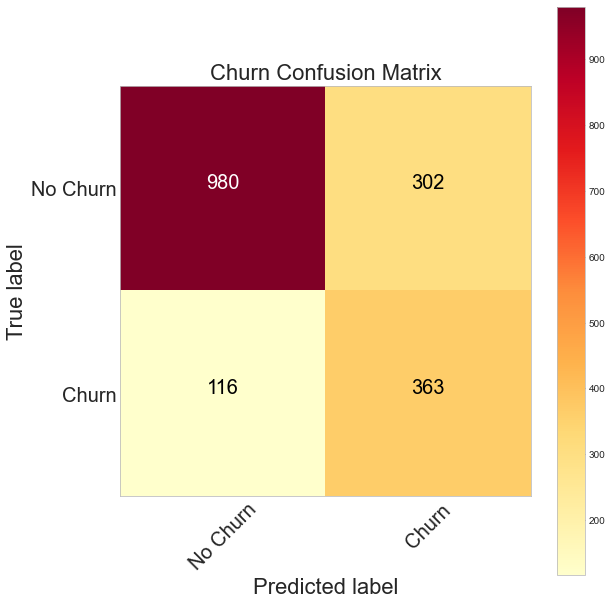

In [152]:
# Make predictions where probability is above threshold
preds = np.zeros(len(y_test))
preds[probs >= threshold_required] = 1

# Make and plot confusion matrix
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm, classes=['No Churn', 'Churn'],
                      title='Churn Confusion Matrix')

if we satisfy our business requirement, this is the best prediction of what our performance would be on new data. The model is about to identify 76% of churned customers compared to a baseline of around 55%. The precision is around 55%. 

In [150]:
fi = pd.DataFrame({'importance': clf.feature_importances_}, index=X.columns).\
    sort_values('importance', ascending=False)
fi.head(10)

,importance
TotalCharges,0.193360
MonthlyCharges,0.180987
tenure,0.171433
InternetService_Fiber optic,0.041965
PaymentMethod_Electronic check,0.037031
Contract_Two year,0.034592
gender,0.028592
PaperlessBilling,0.027731
OnlineSecurity,0.025482
Partner,0.023841
